fatal: destination path 'horses_or_humans_test' already exists and is not an empty directory.
Numpy Version:  1.18.5
Python Version:  3.6.9
Tensorflow Version:  2.3.0
Keras Version:  2.4.0

/content
/content/horses_or_humans_test/thisone
/content/horses_or_humans_test/thisone/horse-or-human
/content/horses_or_humans_test/thisone/validation-horse-or-human
Found 1027 files belonging to 2 classes.
train dataset size: 33 

Found 256 files belonging to 2 classes.
Labels of Classes:  ['horses', 'humans']
Original Image Data: 
Shape of Image:  (300, 300, 3)
Label of Image:  humans
Original Scale:  [[[114.  83.  64.]
  [114.  83.  64.]
  [113.  83.  64.]
  ...
  [ 82.  65.  54.]
  [ 82.  65.  54.]
  [ 82.  65.  54.]]

 [[114.  84.  64.]
  [114.  83.  64.]
  [114.  83.  64.]
  ...
  [ 83.  65.  54.]
  [ 83.  65.  54.]
  [ 83.  65.  54.]]

 [[115.  84.  64.]
  [115.  84.  64.]
  [115.  84.  64.]
  ...
  [ 84.  66.  54.]
  [ 84.  66.  54.]
  [ 84.  66.  54.]]

 ...

 [[ 98.  96.  92.]
  [ 90.  87

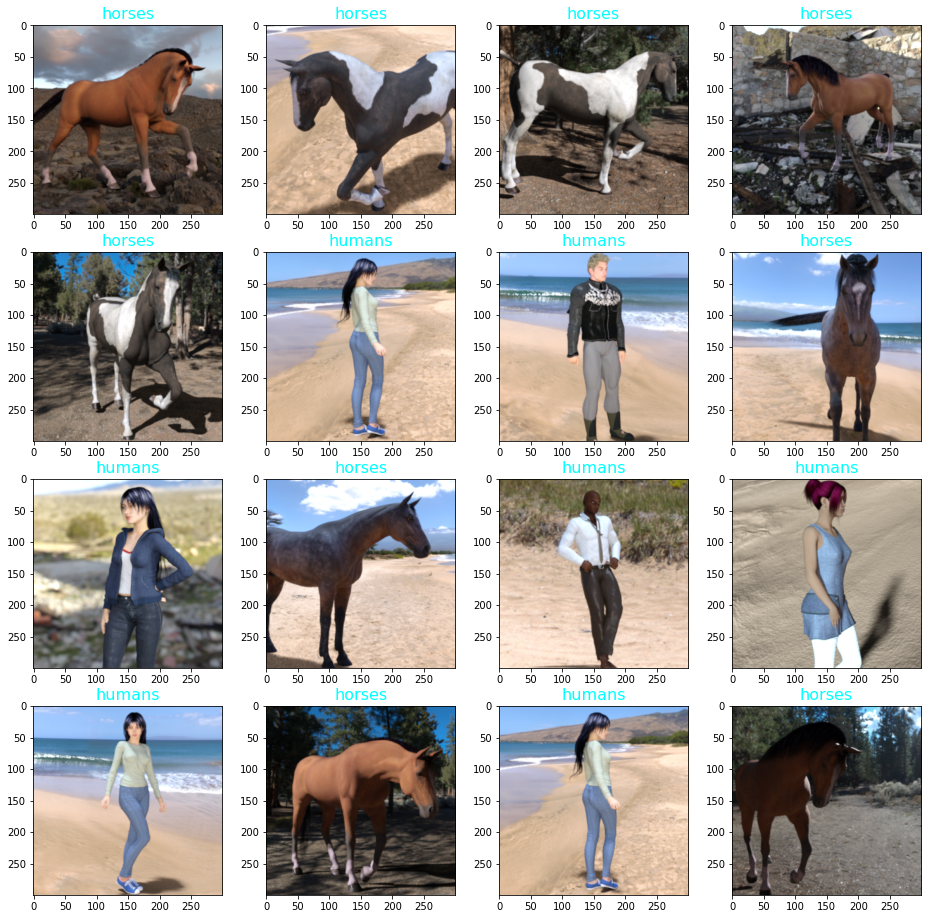

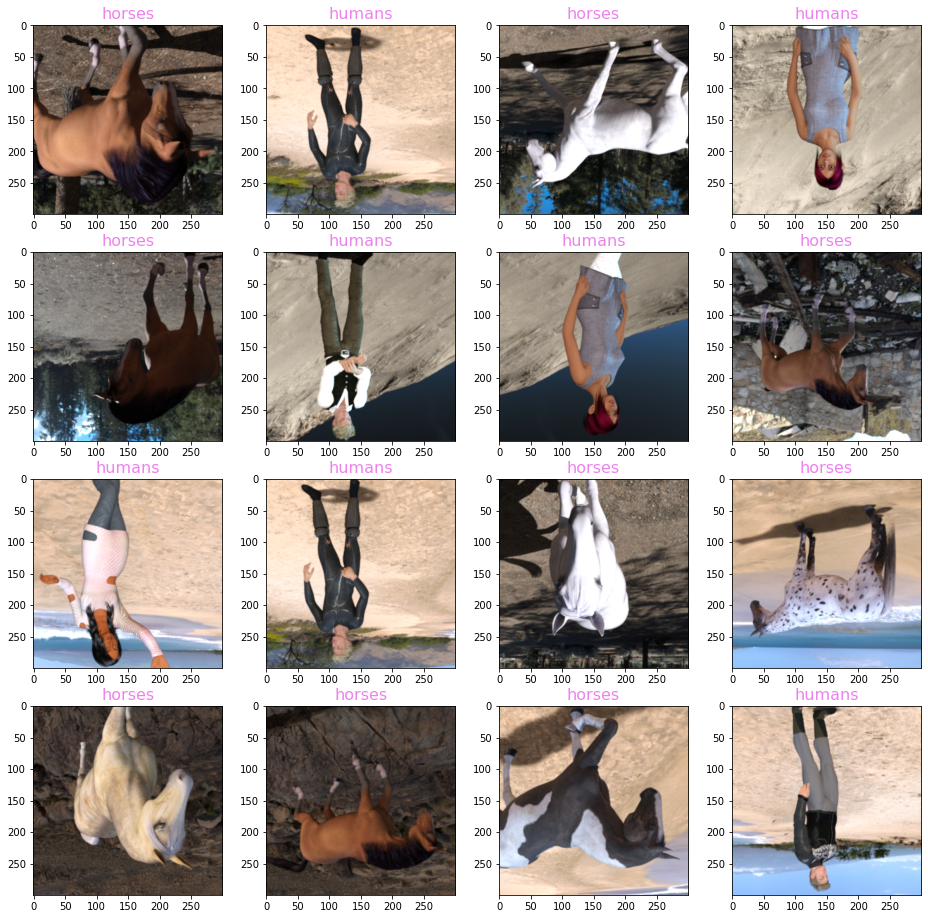

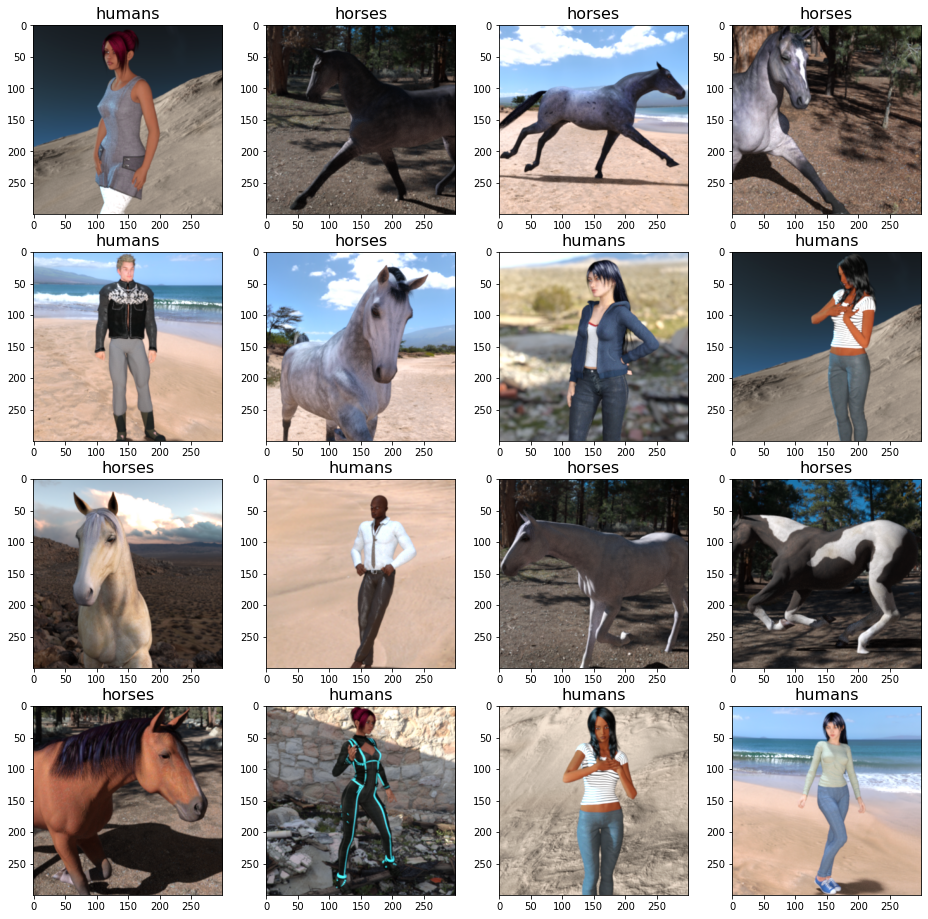

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

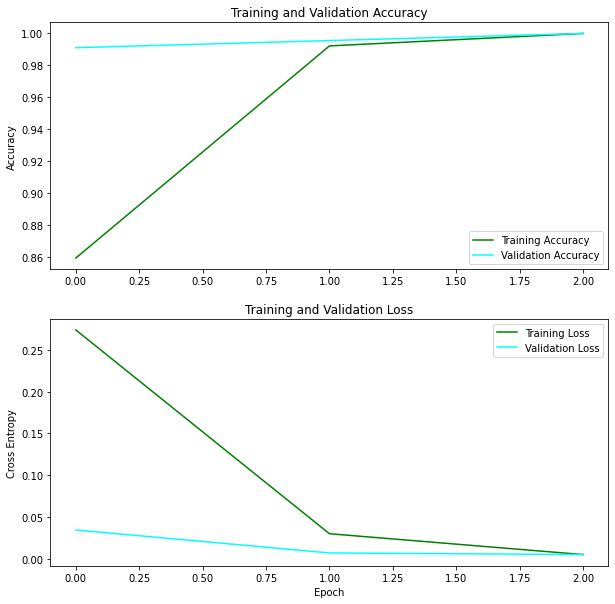

Prediction  0   0.99999404   5.9335916e-06
Prediction  1   0.00080437714   0.99919564
Prediction  2   0.00082155026   0.99917847
Prediction  3   1.0   1.4238524e-09
Prediction  4   1.0   1.699155e-10
Prediction  5   1.0   2.2701672e-10
Prediction  6   0.9999957   4.343824e-06
Prediction  7   0.9999993   6.798298e-07
Prediction  8   0.0007039979   0.99929595
Prediction  9   0.0010016499   0.99899834
Prediction  10   0.0019461781   0.9980538
Prediction  11   1.0   2.1781752e-09
Prediction  12   1.0   9.1320716e-14
Prediction  13   0.9999571   4.2969816e-05
Prediction  14   0.9999999   1.3754975e-07
Prediction  15   1.0   1.3578398e-11
Prediction  16   0.0032030803   0.9967969
Prediction  17   0.99999416   5.8766636e-06
Prediction  18   0.0032716652   0.9967283
Prediction  19   1.0   1.09050206e-10
Prediction  20   0.9999988   1.1701911e-06
Prediction  21   1.0   6.923936e-11
Prediction  22   0.9999988   1.239469e-06
Prediction  23   1.0   7.036779e-12
Prediction  24   1.0   8.936038e-11


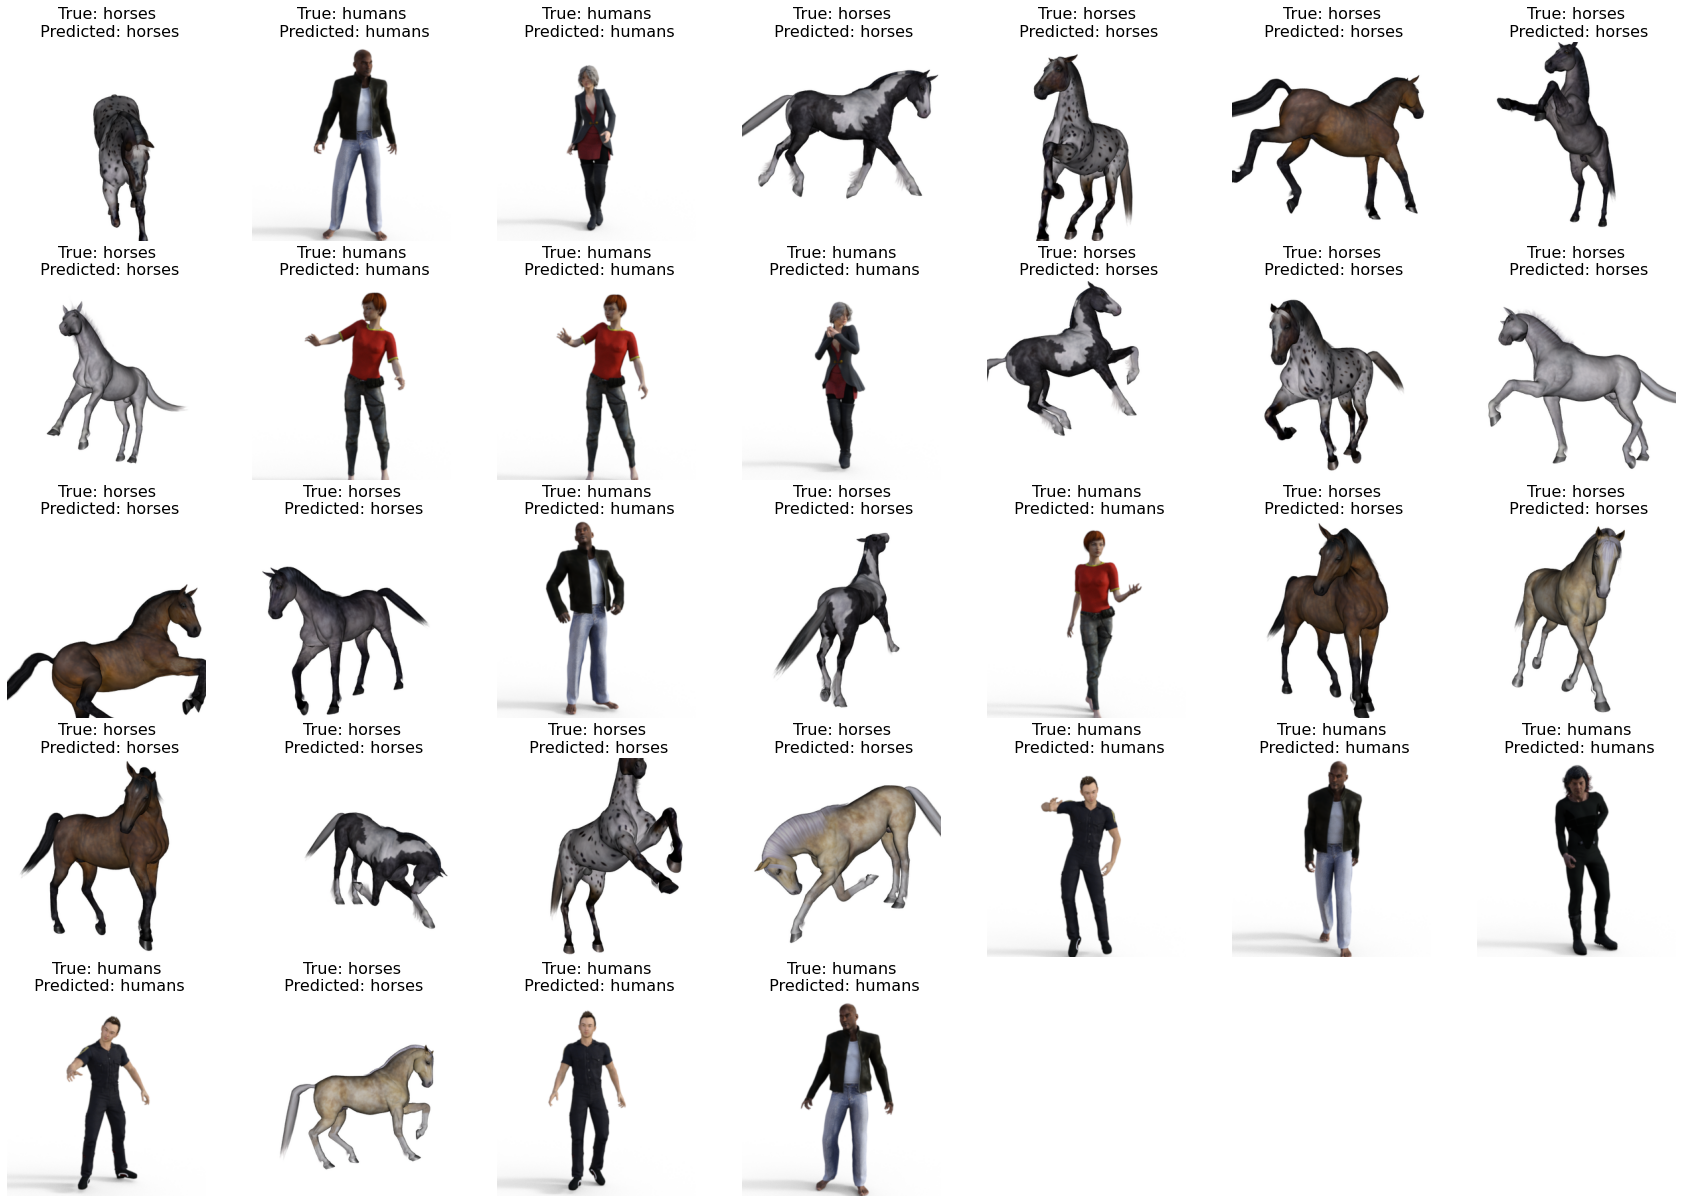

In [7]:
# James Hooper ~ NETID: jah171230
# Hritik Panchasara ~ NETID: hhp160130
# Run this in Google Colab
!git clone "https://github.com/jamesH-48/horses_or_humans_test.git"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import platform
import os
from keras.layers import Flatten, Dense, Input
from keras.models import Model

def preprocess():
    print(os.getcwd())
    PATH = os.getcwd() + "/horses_or_humans_test" + "/thisone"
    print(PATH)
    train_dir = PATH + "/horse-or-human"
    validation_dir = PATH + "/validation-horse-or-human"
    print(train_dir)
    print(validation_dir)
    
    BATCH_SIZE = 32
    IMG_SIZE = (300, 300)

    # Get the train & validation datasets
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                 shuffle=True,
                                                 batch_size=BATCH_SIZE,
                                                 image_size=IMG_SIZE)
    print('train dataset size:', len(list(train_dataset)), '\n')
    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                                    validation_dir,
                                                    shuffle=True,
                                                    batch_size=BATCH_SIZE,
                                                    image_size=IMG_SIZE)
    # Get class labels
    labels_of_classes = train_dataset.class_names
    print("Labels of Classes: ", labels_of_classes)
    print_images(train_dataset, labels_of_classes, 'cyan')
    print("Original Image Data: ")
    print_image_data(train_dataset, labels_of_classes)

    # Spacing
    print()

    # Make Test Data Set
    # This should leave 1 batch for testing (32 Images)
    # For this project we only need 25 images
    VAL_BATCHES = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(VAL_BATCHES // 5)
    validation_dataset = validation_dataset.skip(VAL_BATCHES // 5)
    print("Number of validation batches: ", tf.data.experimental.cardinality(validation_dataset))
    print("Number of test batches: ", tf.data.experimental.cardinality(test_dataset))

    # We need to configure the dataset for performance
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

    # Augment Data
    train_dataset = augmentation(train_dataset, labels_of_classes)
    # print('train dataset size:', len(list(train_dataset)), '\n')

    plt.show()
    return train_dataset, validation_dataset, test_dataset, labels_of_classes

# Image Augmentation to add more images to dataset
def augmentation(data, labels_of_classes):
    new_data = data
    temp_data = data

    # Print length of data aka number of examples
    # Should be 1027
    # print("Length of Data", len(list(new_data)))

    '''
      Rotate Data
        - This should double our data size by adding more images to the set
    '''
    temp_data = temp_data.map(aug_rot90)
    new_data = new_data.concatenate(temp_data)
    print_images(temp_data, labels_of_classes, 'violet')
    # Print length of data aka number of examples
    # Should be 1027*4 = 4108
    # print("Length of Data", len(list(new_data)))

    '''
      Randomly Change the Hue of the Data
        - This should add 1027 more images to the dataset
    '''
    temp_data = data.map(aug_rand_hue)
    print_images(temp_data, labels_of_classes, 'black')
    new_data = new_data.concatenate(temp_data)

    # Print length of data aka number of examples
    # Should be 4108 + 1027 = 5135
    # print("Length of Data", len(list(new_data)))

    return new_data

def aug_rot90(image, label):
    # upside down
    image = tf.image.rot90(image, 2)
    return image, label

def aug_rand_hue(image, label):
    image = tf.image.random_hue(image, max_delta=.1)
    return image, label

# print out images for comparisson
def print_images(data, labels_of_classes, color_choice):
    # Plot Some Images of the Dataset for viewing
    # Original Scale
    plt.figure(figsize=(16, 16))
    font = {
        'color':  color_choice,
        'weight': 'normal',
        'size': 16,
        }

    for images, labels in data.take(1):
        for i in range(16):
            plt.subplot(4, 4, i+1)
            label = labels_of_classes[labels[i]]
            plt.title(label, fontdict=font)
            plt.imshow(images[i].numpy().astype("uint8"))

# print out data for a single image
def print_image_data(data, labels_of_classes):
    for image, label in data.take(1):
        print("Shape of Image: ", image[0].numpy().shape)
        print("Label of Image: ", labels_of_classes[label[0]])
        print("Original Scale: ", image[0].numpy())

def model(train_dataset, validation_dataset, test_dataset, labels_of_classes):
    # Scale values for Base Model
    preprocess_input = tf.keras.applications.vgg16.preprocess_input
    # VGG16 Base Model
    base_model_VGG16 = tf.keras.applications.VGG16(
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )
    print(base_model_VGG16.summary())
    base_model_VGG16.trainable = False

    inputs = tf.keras.Input(shape=(300,300,3))
    x = preprocess_input(inputs)
    x = base_model_VGG16(x, training=False)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = Dense(4096, activation ='relu', name = 'FC1')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(2, activation='softmax', name='Predictions')(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

    print(model.summary())

    initial_epochs = 3
    #loss0, accuracy0 = model.evaluate(validation_dataset)
    #print("initial loss: {:.2f}".format(loss0))
    #print("initial accuracy: {:.2f}".format(accuracy0))

    history = model.fit(train_dataset,
                        epochs=initial_epochs,
                        steps_per_epoch = 8,
                        validation_steps = 7,
                        validation_data=validation_dataset)

    # data results for plotting
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Training & Validation Accuracy
    plt.figure(figsize=(10,10))
    plt.subplot(2, 1, 1)
    plt.plot(accuracy, label='Training Accuracy', color='green')
    plt.plot(val_accuracy, label='Validation Accuracy', color='cyan')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    # Training & Validation Loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss', color='green')
    plt.plot(val_loss, label='Validation Loss', color='cyan')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.show()

    # Use Test Dataset for Final Predictions
    test_image_batch, test_label_batch = test_dataset.as_numpy_iterator().next()
    predictions = model.predict_on_batch(test_image_batch).flatten()
    # Convert to numpy array
    predictions = np.array(predictions)

    # We need to convert the predictions to be alligned with the test_label_batch
    # Predictions at this point will be in the format [horse, human]
    # Which ever value is higher is the chosen class (highest probability)
    # Basically the predictions array is 64 long and we need to get it to be 32 long
    # [x1, y1, ..., x64, y64] -> [1, 0, ...]
    # if x1 > y1 then 0; if x1 < y1 then 1
    # Takes in even array
    # Outputs an even array half the size
    # Compares two numbers at a time within input
    # If the first number is larger than the second in the input then the output array gets a 0
    # representing that couple of the input. It gets a 1 in the opposite case.
    i = 0
    true_predictions = np.ones((32,), dtype=int)
    for x in range(0, 64):
        if x % 2 == 0:
            print("Prediction ", i, " ", predictions[x], " ", predictions[x+1])
            if predictions[x] > predictions[x + 1]:
                true_predictions[i] = 0
            else:
                true_predictions[i] = 1
            i += 1

    print("Predictions for Test Dataset:\n", true_predictions)
    print("Labels:\n", test_label_batch)
    array_correct_check(true_predictions, test_label_batch)

    font = {
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

    plt.figure(figsize=(30, 30))
    for i in range(32):
        ax = plt.subplot(7, 7, i+1)
        plt.imshow(test_image_batch[i].astype("uint8"))
        title = "True: " + labels_of_classes[test_label_batch[i]] + "\n"
        title = title + " Predicted: " + labels_of_classes[true_predictions[i]]
        plt.title(label=title, fontdict=font)
        plt.axis("off")
    plt.show()

def array_correct_check(arr1, arr2):
   num_correct = 0
   for i in range(0, 32):
      if arr1[i] == arr2[i]:
         num_correct+=1
   print("Percent Correct: ", num_correct/32 * 100, "%")

if __name__ == '__main__':
    # Print out main versions of packages used
    print("Numpy Version: ", np.version.version)
    print("Python Version: ", platform.python_version())
    print("Tensorflow Version: ", tf.__version__)
    print("Keras Version: ", tf.keras.__version__)
    print()

    # Call Pre-Process Function
    train_dataset, validation_dataset, test_dataset, labels_of_classes = preprocess()

    # Call Model Function
    model(train_dataset, validation_dataset, test_dataset, labels_of_classes)
